In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot  as plt

In [2]:
book=pd.read_csv("D:/ExcelR/Association/book.csv")

In [3]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# using apriori for determing support of itemsets (with min_support=0.1)

In [4]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [5]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of     support                       itemsets
2    0.4310                      (CookBks)
0    0.4230                     (ChildBks)
3    0.2820                     (DoItYBks)
6    0.2760                      (GeogBks)
10   0.2560            (ChildBks, CookBks)
1    0.2475                     (YouthBks)
5    0.2410                       (ArtBks)
4    0.2145                       (RefBks)
14   0.1950            (GeogBks, ChildBks)
22   0.1925             (GeogBks, CookBks)
19   0.1875            (DoItYBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
21   0.1670              (ArtBks, CookBks)
9    0.1650           (ChildBks, YouthBks)
13   0.1625             (ChildBks, ArtBks)
15   0.1620            (YouthBks, CookBks)
20   0.1525              (RefBks, CookBks)
12   0.1515             (RefBks, ChildBks)
33   0.1495   (GeogBks, ChildBks, CookBks)
30   0.1460  (DoItYBks, ChildBks, CookBks)
26   0.1325            (DoItYBks, GeogBks)
29   0.1290  (C

In [6]:
# rules with min confidence of 0.5

In [7]:
confidence_rules= association_rules(frequent_itemsets,metric='confidence',min_threshold=0.5)
confidence_rules
confidence_rules.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
46,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
34,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
40,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
29,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
30,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
44,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
22,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
16,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
38,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


In [8]:
C=confidence_rules[confidence_rules.confidence>=0.8]
C

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
30,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
32,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
34,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
40,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
46,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159


In [9]:
# Finding association rules wiht threshold of 0.8
# Sorting the association rules with heighest lift ratio for top 10

In [10]:
lift_rules = association_rules(frequent_itemsets,metric="lift",min_threshold=0.8)
lift_rules
lift_rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
62,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
88,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
89,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
96,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
93,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
82,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
83,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
81,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
84,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [11]:
L=lift_rules[lift_rules.lift>1]
L

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
95,(DoItYBks),"(ArtBks, CookBks)",0.2820,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418
96,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
97,(CookBks),"(DoItYBks, ArtBks)",0.4310,0.1235,0.1015,0.235499,1.906873,0.048272,1.146499
98,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


In [12]:
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

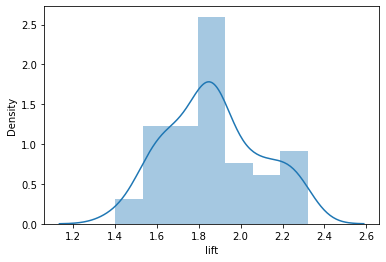

In [13]:
sns.distplot(L["lift"])

Text(0.5, 1.0, 'confidence vs lift')

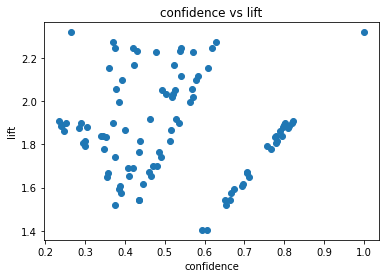

In [14]:
con=lift_rules['confidence']
lif=lift_rules['lift']
plt.scatter(con,lif)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')

Text(0.5, 1.0, ' lift vs confidence ')

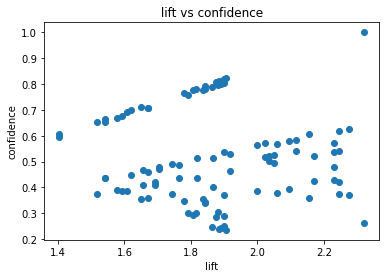

In [15]:
con=lift_rules['confidence']
lif=lift_rules['lift']
plt.scatter(lif,con)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title(' lift vs confidence ')

# using apriori for determing support of itemsets (with min_support=0.17)

In [16]:
frequent_itemsets_1=apriori(book,min_support=0.17,use_colnames=True)
frequent_itemsets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"
8,0.1840,"(DoItYBks, ChildBks)"
9,0.1950,"(GeogBks, ChildBks)"


In [17]:
rules=association_rules( frequent_itemsets_1, metric='lift', min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
6,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
7,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

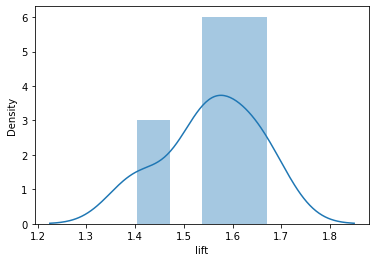

In [18]:
sns.distplot(rules.lift)

Text(0.5, 1.0, 'confidence vs lift')

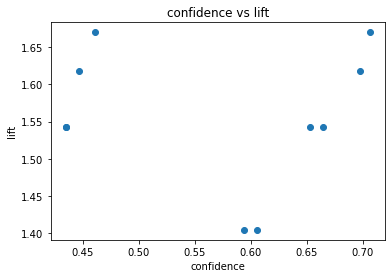

In [19]:
con=rules['confidence']
lif=rules['lift']
plt.scatter(con,lif)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')